# Import the Dataset

### Import Relevant Libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data=pd.read_csv("Missing Values Removed Dataset.csv")

### Intial Analysis of Dataset

In [3]:
raw_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,5.971861,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,252.848888,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,252.848888,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
raw_data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [5]:
print(raw_data.shape)

(3276, 10)


# Feature Selection

## 01). Dropping Constant Features
### (Removing Low Variance Features, Which do not affect to final output)

In [8]:
#removing class attribute
raw_data2=raw_data.drop(["Potability"],axis=1)

In [9]:
raw_data2.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,5.971861,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.05786,6.635246,252.848888,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.54173,9.275884,252.848888,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [10]:
#import Variance Threshold class
from sklearn.feature_selection import VarianceThreshold

In [11]:
#create variance threshold object
var_thres=VarianceThreshold(threshold=0)

In [12]:
var_thres.fit(raw_data2)

VarianceThreshold(threshold=0)

In [13]:
#print low variance features
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

### Conclusion: All attributes' variance does not equal to 0. Therefore, no need of removing attributes

## 02). Pearson Correlation
### (Removing independent features which are highly correlated)

In [18]:
#calculate correlation
corr=raw_data2.corr()
corr

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
ph,1.000000,0.072258,-0.078639,-0.028537,0.004309,0.025330,0.040428,0.007124,-0.031166
Hardness,0.072258,1.000000,-0.046899,-0.030054,-0.073472,-0.023915,0.003610,-0.012541,-0.014449
Solids,-0.078639,-0.046899,1.000000,-0.070148,-0.102030,0.013831,0.010242,-0.009866,0.019546
Chloramines,-0.028537,-0.030054,-0.070148,1.000000,0.015360,-0.020486,-0.012653,0.016743,0.002363
Sulfate,0.004309,-0.073472,-0.102030,0.015360,1.000000,-0.020290,0.035004,-0.026357,-0.005601
Conductivity,0.025330,-0.023915,0.013831,-0.020486,-0.020290,1.000000,0.020966,0.002216,0.005798
Organic_carbon,0.040428,0.003610,0.010242,-0.012653,0.035004,0.020966,1.000000,-0.013090,-0.027308
Trihalomethanes,0.007124,-0.012541,-0.009866,0.016743,-0.026357,0.002216,-0.013090,1.000000,-0.021843
Turbidity,-0.031166,-0.014449,0.019546,0.002363,-0.005601,0.005798,-0.027308,-0.021843,1.000000


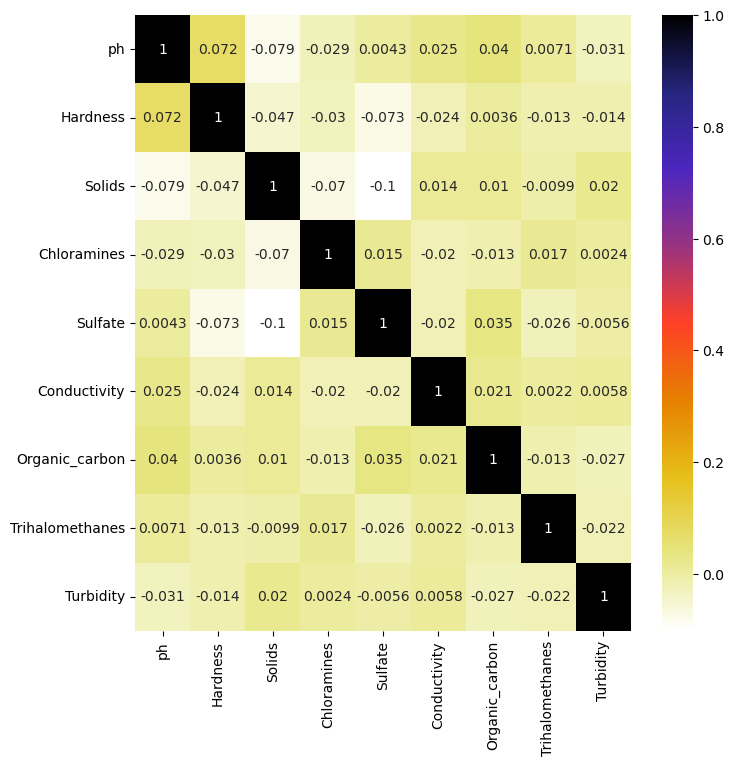

In [25]:
# display pearson correlation matrix
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

### Conclusion: There is not any highly correlated independent features. Therefore, no need of removing attributes